# Theoretical spot modulation with `fleck`

Let's do theoretical spot modulation with [fleck](https://fleck.readthedocs.io/en/latest/)!

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from fleck import Star

In [4]:
from fleck import generate_spots

spot_contrast = 0.7
u_ld = [0.5079, 0.2239]

n_phases = 30
n_inclinations = 1000
n_spots = 3

In [5]:
spot_radius = 0.1   # Rspot/Rstar

## Cycle 1: Starspots are all in the northern Hemisphere

In [6]:
min_latitude = 20   # deg
max_latitude = 45   # deg

lons, lats, radii, inc_stellar = generate_spots(min_latitude, max_latitude,
                                                spot_radius, n_spots,
                                                n_inclinations=n_inclinations)

In [7]:
star = Star(spot_contrast=spot_contrast, n_phases=n_phases, u_ld=u_ld, rotation_period=7)

In [8]:
lcs = star.light_curve(lons, lats, radii, inc_stellar)

In [9]:
df_north = pd.DataFrame({'inc':np.abs(inc_stellar), 
                         'ptp':100*np.ptp(lcs, axis=0)/np.mean(lcs, axis=0),
                         'mean_flux':np.mean(lcs, axis=0)})

Text(0, 0.5, 'Peak-to-Valey Amplitude (%)')

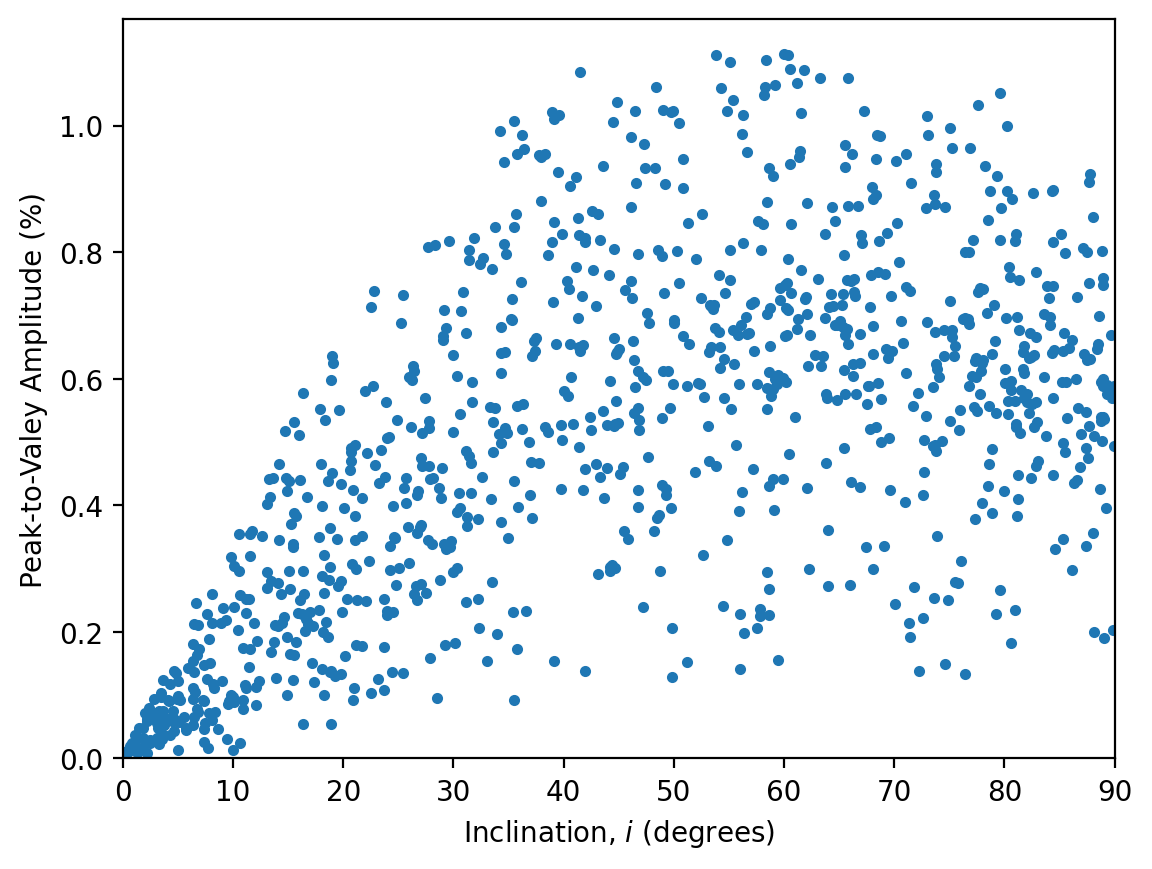

In [10]:
plt.plot(df_north.inc, df_north.ptp, '.')
plt.ylim(0)
plt.xlim(0, 90)
plt.xlabel("Inclination, $i$ (degrees)")
plt.ylabel("Peak-to-Valey Amplitude (%)")
#plt.xticks([-90,-75,-60,-45,-30,-15,0,])

## Cycle 2: Starspots are all in the Sorthern Hemisphere

In [11]:
min_latitude = -20   # deg
max_latitude = -45   # deg

lons, lats, radii, inc_stellar = generate_spots(min_latitude, max_latitude,
                                                spot_radius, n_spots,
                                                n_inclinations=n_inclinations)

In [12]:
star = Star(spot_contrast=spot_contrast, n_phases=n_phases, u_ld=u_ld, rotation_period=7)

In [13]:
lcs = star.light_curve(lons, lats, radii, inc_stellar)

In [14]:
df_south = pd.DataFrame({'inc':np.abs(inc_stellar), 
                         'ptp':100*np.ptp(lcs, axis=0)/np.mean(lcs, axis=0),
                        'mean_flux':np.mean(lcs, axis=0)})

In [15]:
df_north['hemisphere']='North'
df_south['hemisphere']='South'

In [16]:
df = pd.concat([df_north, df_south])

In [17]:
df

,inc,ptp,mean_flux,hemisphere
0,41.343439,0.696257,0.996471,North
1,60.500410,1.089403,0.996235,North
2,29.995276,0.516406,0.996418,North
3,29.139323,0.339612,0.995847,North
4,65.351381,0.681828,0.996464,North
...,...,...,...,...
995,6.635565,0.000000,1.000000,South
996,62.918740,0.173249,0.999028,South
997,83.169050,0.459328,0.998148,South
998,82.587942,0.572721,0.998042,South


Text(0, 0.5, 'Peak-to-Valey Amplitude (%)')

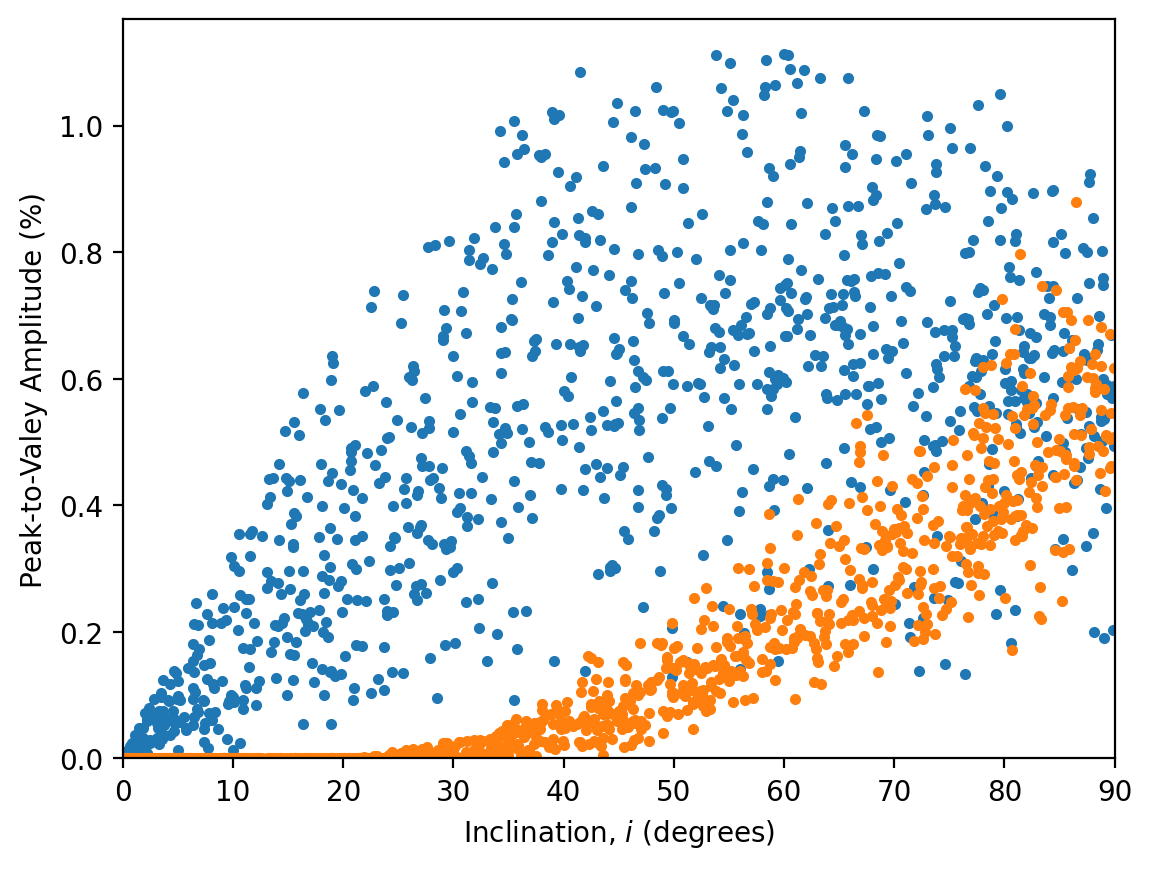

In [18]:
mask = df.hemisphere == 'North'
plt.plot(df.inc[mask], df.ptp[mask], '.', label='North')

mask = df.hemisphere == 'South'
plt.plot(df.inc[mask], df.ptp[mask], '.', label='North')

plt.ylim(0)
plt.xlim(0, 90)
plt.xlabel("Inclination, $i$ (degrees)")
plt.ylabel("Peak-to-Valey Amplitude (%)")
#plt.xticks([-90,-75,-60,-45,-30,-15,0,])

Neat!  We don't *observe* inclination, so let's reassemble this chart into short/long-term variability.

In [19]:
df_north['reversal_flux'] = np.NaN
df_north['reversal_ptp'] = np.NaN

In [ ]:
df_north[]

In [20]:
for i in range(n_inclinations):
    state1 = df_north.iloc[i]
    state2 = df_south.iloc[np.argmin(np.abs(df_south.inc-state1.inc))]
    df_north.loc[i, 'reversal_flux'] = state2.mean_flux
    df_north.loc[i, 'reversal_ptp'] = state2.ptp

In [21]:
j=0

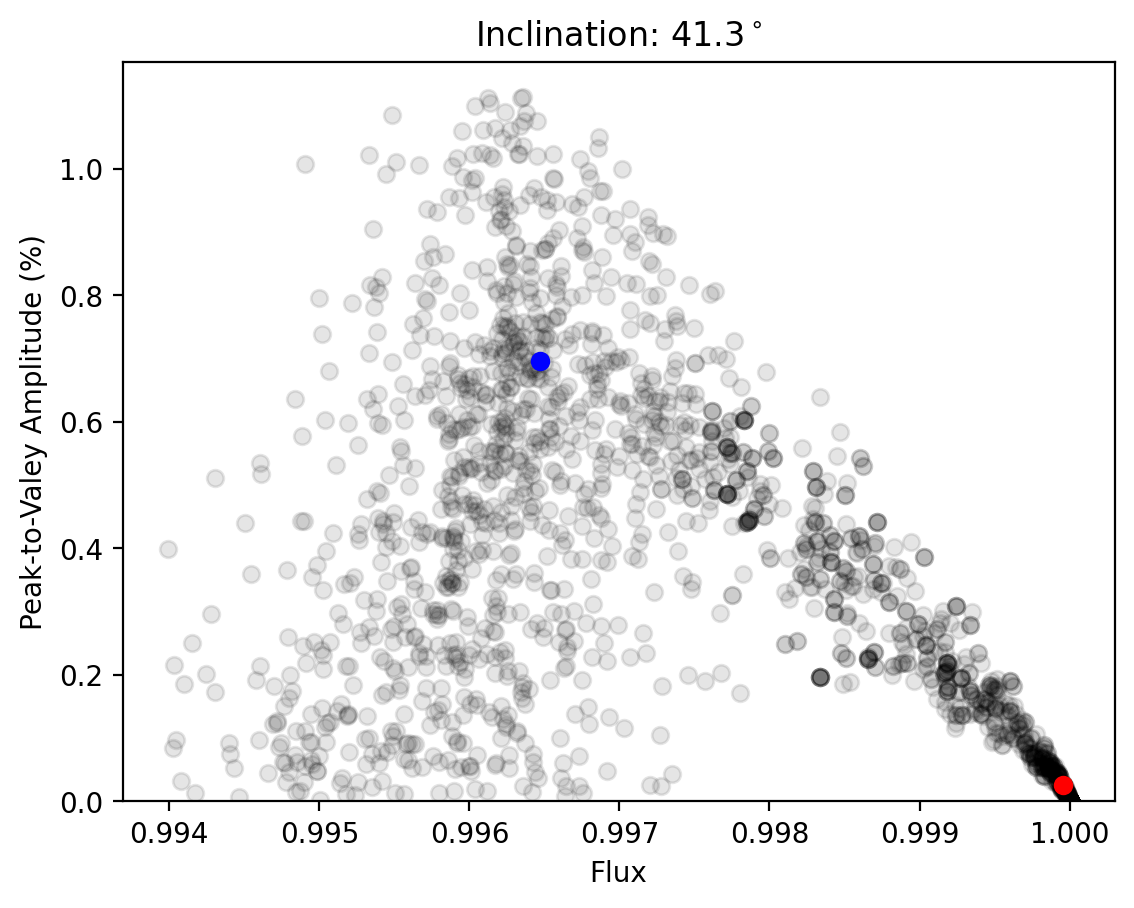

In [22]:
plt.plot(df_north.mean_flux, df_north.ptp, 'ko', alpha=0.1)
plt.plot(df_north.reversal_flux, df_north.reversal_ptp, 'ko', alpha=0.1)

draw = df_north.iloc[j]
plt.plot(draw.mean_flux, draw.ptp, 'bo', alpha=1)
plt.plot(draw.reversal_flux, draw.reversal_ptp, 'ro', alpha=1)
plt.title('Inclination: {:0.1f}$^\circ$'.format(draw.inc))

plt.ylim(0)
plt.xlabel("Flux")
plt.ylabel("Peak-to-Valey Amplitude (%)")

j+=1

In [23]:
import astropy.units as u

In [24]:
spot_radii = np.array([[0.1], [0.1]])
spot_lons = np.array([[0], [18]]) * u.deg
spot_lats = np.array([[25], [35]]) * u.deg

In [25]:
inc_stellar

<Quantity [ 84.64808622,  -1.20390352, -56.24728992, -51.63447885,
           -78.40855051, -50.1612918 ,  46.02179982, -42.14376278,
           -84.23701572,  22.77932956, -69.27669116, -17.67241974,
           -52.50250617,  12.08822415,  36.13753984,   2.59271735,
             7.78503578, -83.37442113, -70.63104156, -24.6840298 ,
           -56.26466978, -21.87709441,  23.16898598, -72.95716408,
            71.15427987, -53.5004087 , -69.61449805, -24.61534287,
           -35.65335952,  43.60308118, -33.84100817,  35.49930221,
            16.11201753,  -1.16916577,  -4.09362706, -49.65986161,
             3.61404766,  56.50996514,  45.27706909, -79.00338497,
           -77.90317221, -31.41068473, -18.0253547 , -41.58526306,
             3.67693838, -27.84677844,  76.48936025, -72.92226521,
            34.99864972,  60.9641763 , -28.8709843 , -82.60710371,
            47.84713604, -30.30433449,   0.33967218,  83.20510185,
           -61.89814994, -13.35095335, -77.75082482, -81.11769

In [26]:
radii[:, 0]

array([0.1, 0.1, 0.1])

In [27]:
radii.shape

(3, 1000)

In [28]:
spot_radii.shape

(2, 1)

In [29]:
inc_stellar[0]

<Quantity 84.64808622 deg>

In [30]:
times = np.linspace(-0.5, 0.5, 500)

In [31]:
i=0

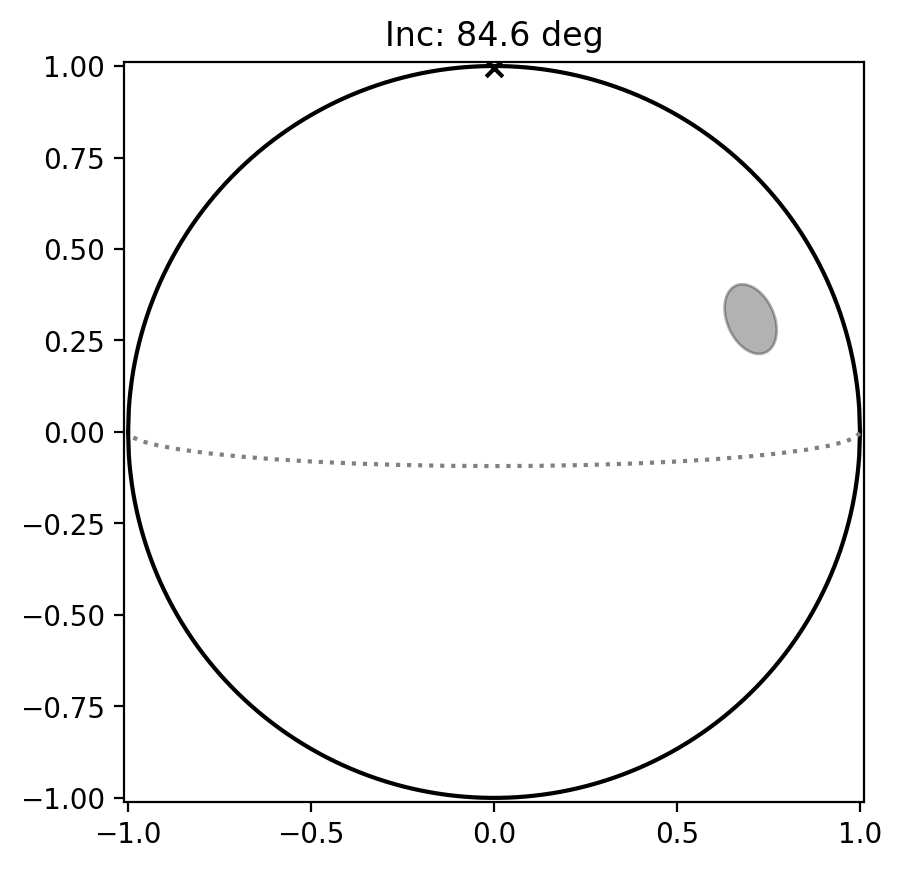

In [32]:
ax = star.plot(lons[:, i].reshape(3, 1), -lats[:,i].reshape(3, 1), radii[:, i].reshape(3, 1), 
               inc_stellar[i], planet=None,
               time=0)
ax.set_title('Inc: {:0.1f}'.format(inc_stellar[i]))
i+=1

In [33]:
lcs.shape

(30, 1000)

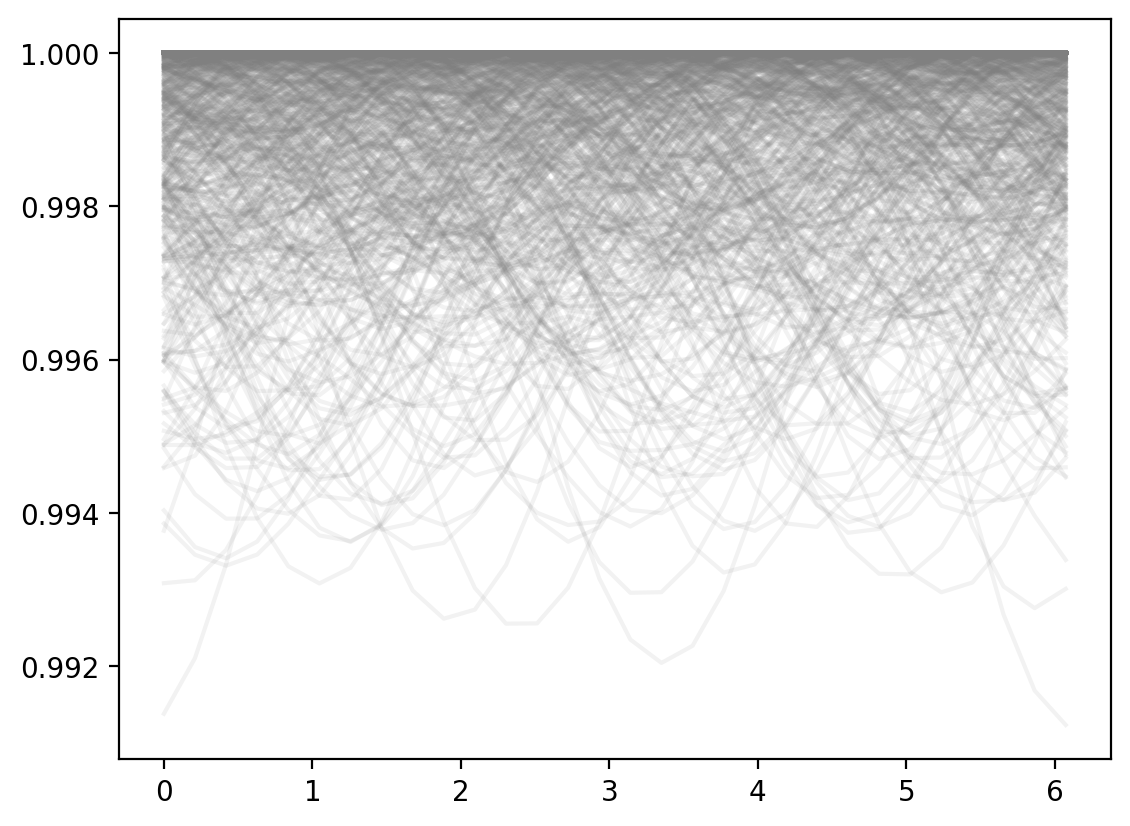

In [34]:
import matplotlib.pyplot as plt
plt.plot(star.phases, lcs, color='gray', alpha=0.1)
plt.show()